<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Regression with Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


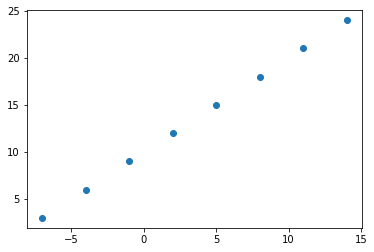

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)

### Input and output shapes

In [3]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([996700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([996700], dtype=int32)>)

In [4]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

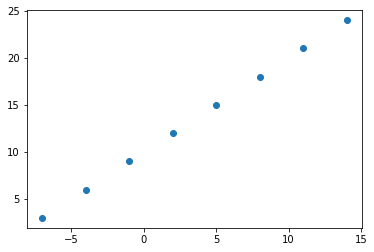

In [6]:
plt.scatter(X, y)

### Steps in Modelling with Tensorflow

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=5)



Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Predict using the trained model
y_pred = model.predict([17])
y_pred

array([[12.716021]], dtype=float32)

### Improving the Model

In [10]:
# 1. increasing the Epocs
model.fit(X, y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7098 - mae: 10.7098
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5773 - mae: 10.5773
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3123 - mae: 10.3123
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1798 - mae: 10.1798
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0473 - mae: 10.0473
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9148 - mae: 9.9148
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7823 - mae: 9.7823
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 9.6498 - mae: 9.6498
Epoch 11/100
1/1 [==============================] - 0s 5ms/ste

In [13]:
y_pred = model.predict([17.])
y_pred

array([[30.19601]], dtype=float32)

In [17]:
# Changing the optimizer

# 1. Create a model using the sequential API
model= tf.keras.Sequential([                    
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 380ms/step - loss: 10.5874 - mae: 10.5874
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5829 - mae: 10.5829
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5784 - mae: 10.5784
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5739 - mae: 10.5739
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5694 - mae: 10.5694
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5649 - mae: 10.5649
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5604 - mae: 10.5604
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5559 - mae: 10.5559
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5514 - mae: 10.5514
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5469 - mae: 10.5469
Epoch 11/100
1/1 [==============================] - 0s

In [18]:
y_pred = model.predict([17.])
y_pred

array([[15.947106]], dtype=float32)

In [21]:
# Adding the hidden layer

# 1. Create a model using the sequential API
model= tf.keras.Sequential([                    
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss="mae",
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 340ms/step - loss: 13.0842 - mae: 13.0842
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.4448 - mae: 12.4448
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7987 - mae: 11.7987
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1382 - mae: 11.1382
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4613 - mae: 10.4613
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7674 - mae: 9.7674
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0461 - mae: 9.0461
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2828 - mae: 8.2828
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4796 - mae: 7.4796
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.6388 - mae: 6.6388
Epoch 11/100
1/1 [==============================] - 0s 7ms/step 

In [22]:
y_pred = model.predict([17.])
y_pred

array([[31.910429]], dtype=float32)

In [25]:
# Adding the hidden layer and changing the optimizer

# 1. Create a model using the sequential API
model= tf.keras.Sequential([                    
                            tf.keras.layers.Dense(100, activation="relu"),
                            tf.keras.layers.Dense(1)
])

# 2. compile the model

model.compile(loss="mae",
              optimizer= tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the Model
model.fit(X, y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 409ms/step - loss: 12.7968 - mae: 12.7968
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7113 - mae: 12.7113
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6256 - mae: 12.6256
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5400 - mae: 12.5400
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.4543 - mae: 12.4543
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3685 - mae: 12.3685
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2827 - mae: 12.2827
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 12.1968 - mae: 12.1968
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 12.1109 - mae: 12.1109
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0250 - mae: 12.0250
Epoch 11/100
1/1 [==============================] - 0

In [29]:
y_pred = model.predict([24.])
y_pred

array([[36.414692]], dtype=float32)